<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>


### Stabilized Representations in Lower Dimensional Space


#### Midé Mabadeje$^{1}$ (PhD Candidate) & Michael Pyrcz$^{1,2}$ (Associate Professor), University of Texas at Austin

 1. Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering


 2. Department of Geological Sciences, Jackson School of Geosciences

### Stabilized Representations in Lower Dimensional Space

Here's a demonstration on how to find the optimal rotation, reflection, and translation for corresponding points in a low dimensional space to help stabilize the projections such that the solutions obtained are invariant when using multidimensional scaling (MDS) as a dimensionality reduction method and other Manifold DR methods.


#### Multidimensional Scaling

A powerful ordination method in inferential statistics / information visualization for exploring / visualizing the similarity (conversely the difference) between individual samples from a high dimensional dataset.

* beyond 2 or 3 features it is difficult to visualize the relationship between samples

* for 2 features we can easily visualize the relationships between samples with a scatter plot

* for 3 features we can either visualize in 3D or include color or matrix scatter plots

Multidimensional scaling projects the $m$ dimensional data to $p$ dimensions such that $p << m$.

* ideally we are able to project to $p=2$ to easily explore the relationships between the samples

While principal component analysis (PCA) operates with the covariance matrix, multidimensional scaling operates with the distance / dissimilarity matrix.

* you don't need to know the actual feature values, just the distance or dissimilarity between the samples

* as with any distance in feature space, we consider feature standardization and weighting

* we may also work with a variety of dissimilarity measures


#### Metric Multidimensional Scaling

A generalization of classical multidimensional scaling with a variety of metrics and a loss function optimization.

* formulated as an optimization problem to minimize the square difference between the original and projected pairwise distances

\begin{equation}
min_{x_1,\ldots,x_m} \sum_{i<j} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2
\end{equation}

where $||x_i - x_j||$ are the pairwise distances in the projected space ($p$ dimensional) and $\delta_{i,j}$ are the pairwise distances in the original feature space.


General comments about metric multidimensional scaling:

* nonlinear dimensionality reduction

* no distribution assumption

* dissimilarity measure must be meaningful

* dimensionality reduction is performed such that the error in the sample pairwise distance is minimized

* there is a variant known as Non-metric Multidimensional Scaling for ordinal features (categorical with ordering).

#### Checking Multidimensional Scaling Results

The multidimensional scaling approach minimizes the square difference of the pairwise distances between all of the data samples and eachother between the projected, lower dimensional, and original feature space.

* **stress** is defined as:

\begin{equation}
Stress_P(x_1,\ldots,x_n) = \left( \sum_{i \ne j = 1,\ldots,n} \left( ||x_i - x_j|| - \delta_{i,j} \right)^2 \right)^{\frac{1}{2}}
\end{equation}


However, the above is the raw stress value, which is not very informative as high values does not necessarily indicate bad fit. A better way of communicating reliability is to calculate a normed stress, e.g. with Stress-1 implemented according to Kruskal (1964) on p. 3 where 0 indicates a perfect fit, 0.025 excellent, 0.05 good, 0.1 fair, and 0.2 poor. For more information see Kruskal (1964) p. 8–9 and Borg (2005) p.41–43


\begin{equation}
Stress_{norm} (x_1,\ldots,x_n) = \left( \dfrac { \sum_{i \ne j = 1,\ldots,n} \left( ||x_i - x_j|| - \delta_{i,j} )^2 \right } \left\sum_{i \ne j = 1,\ldots,n}\left( \delta_{i,j}^2 \right)\right \right)^{\frac{1}{2}}
\end{equation}

where $||x_i - x_j||$ are the pairwise distances in the projected space ($p$ dimensional) and $\delta_{i,j}$ are the pairwise distances in the original feature space.


* it is also useful to visualize the scatter plot of projected vs. original pairwise distances

## Rigid Transformations

A rigid transformation also known as isometry or Euclidean transformation is a transformation of the plane that preserves length. Reflections, translations, rotations, and combinations of these three transformations are "rigid transformations".

1. A translation is a transformation which "slides" a figure a fixed distance in a given direction without changing its size or shape, and without turning and flipping it.

2. A rotation is a transformation that turns a figure about a fixed point called the center of rotation. An object and its rotation are the same shape and size, but the figures may be turned in different directions. Rotations may be clockwise or counterclockwise.

3. A reflection can be thought of as folding or "flipping" an object over the line of reflection A point reflection exists when a figure is built around a single point called the center of the figure, or point of reflection.  For every point in the figure, there is another point found directly opposite it on the other side of the center such that the point of reflection becomes the midpoint of the segment joining the point with its image.  Under a point reflection, figures do not change size or shape.

However, in the case of MDS projections from high dimensional datasets to low dimensions these transformations are common place individually or combinatorially.

## Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/).
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal.
3. In the terminal type: pip install geostatspy.
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality.

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV_v4.csv at https://git.io/fhHLT.

There are examples below with GeostatsPy functions. You can go here to see a list of the available functions, https://git.io/fh4eX, and for other example workflows and source code.

### Import Library

In [1]:
import Functions as fn                    # imports script consisting of functions to run workflow
import numpy as np                        # ndarray for gridded data
import pandas as pd                       # DataFrames for tabular data
import joypy
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
import seaborn as sns                     # for matrix scatter plots
from shapely.geometry import Polygon, Point
from scipy.spatial import ConvexHull
from sklearn.metrics.pairwise import euclidean_distances

### Set the working directory

I always like to do this so, I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [2]:
%pwd

'/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Notebooks'

In [3]:
os.chdir('/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/Fall 2022/Data')                     # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.

In [4]:
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv')
df['TOC'] = np.where(df['TOC']<0.0, 0.0, df['TOC']) # set TOC < 0.0 as 0.0, otherwise leave the same
df.head()                             # we could also use this command for a table preview

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624


This dataset has features from 200 unconventional wells including: 

0. well index
1. well average porosity (%) 
2. permeability (mD)
3. accoustic impedance (kg/m2s*10^6)
4. brittness ratio (%) 
5. total organic carbon (%) 
6. vitrinite reflectance (%)
8. normalized initial production 90 day average (MCFPD). 

Note, the dataset is synthetic, but has realistic ranges and general multivariate relationships.

Ranking features is really an effort to understand the features and their relationships with eachother.  We will start with basic data visualization and move to more complicated methods such are partial correlation and recursive feature elimination.

<br>

#### Summary Statistics

Let's check the summary statistics of our data.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.991950,0.478264,0.000000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,3864.407081,1553.277558,839.822063,2686.227611,3604.303506,4752.637555,8590.384044


Summary statistics are a critical first step in data checking. 

* this includes the number of valid (non-null) values for each feature (count removes all np.NaN from the totals for each variable).

* we can see the general behaviours such as central tendency, mean, and dispersion, variance.

* we can identify issue with negative values, extreme values, and values that are outside the range of plausible values for each property. 

* We can also establish the feature ranges for plotting.  We could calculate the feature range directly from the data with code like this:

```p
Pormin = np.min(df['Por'].values)          # extract ndarray of data table column
Pormax = np.max(df['Por'].values)          # and calculate min and max
```

but, this would not result in easy to understand color bars and axis scales, let's pick convenient round numbers. We will also declare feature labels for ease of plotting. 

In [6]:
pormin = 6.0; pormax = 24.0; porname = 'Porosity (%)'; portitle = 'Porosity' # user specified min and max values, and labels for plotting
permmin = 0.0; permmax = 10; permname = 'Permeability (mD)'; permtitle = 'Permeability'                
AImin = 1.0; AImax = 5.0; AIname = 'Acoustic Impedance (kg/m2s*10^6)'; AItitle = 'Acoustic Impedance'
brmin = 10.0; brmax = 85.0; brname = 'Brittleness Ratio (%)'; brtitle = 'Brittleness'
TOCmin = 0.0; TOCmax = 2.2; TOCname = 'Total Organic Carbon (%)'; TOCtitle = 'Total Organic Carbon' 
VRmin = 0.9; VRmax = 2.9; VRname = 'Vitrinite Reflectance (%)'; VRtitle = 'Vitrinite Reflectance'
prodmin = 500.0; prodmax = 9000.0; prodname = 'Normalized Initial Production (MCFPD)'; prodtitle = 'Normalized Initial Production'

Since the data looks to be in pretty good shape from its summary statistics and for brevity we skip outlier detection since synthetic i.e., a toy dataset. Let's look at the distributions with a martix scatter plot.

/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ademidemabadeje/Documents/UT/Research/PyCharm/LD_Stabilization/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/ademidemabadeje/Documents/UT/Research/PyC

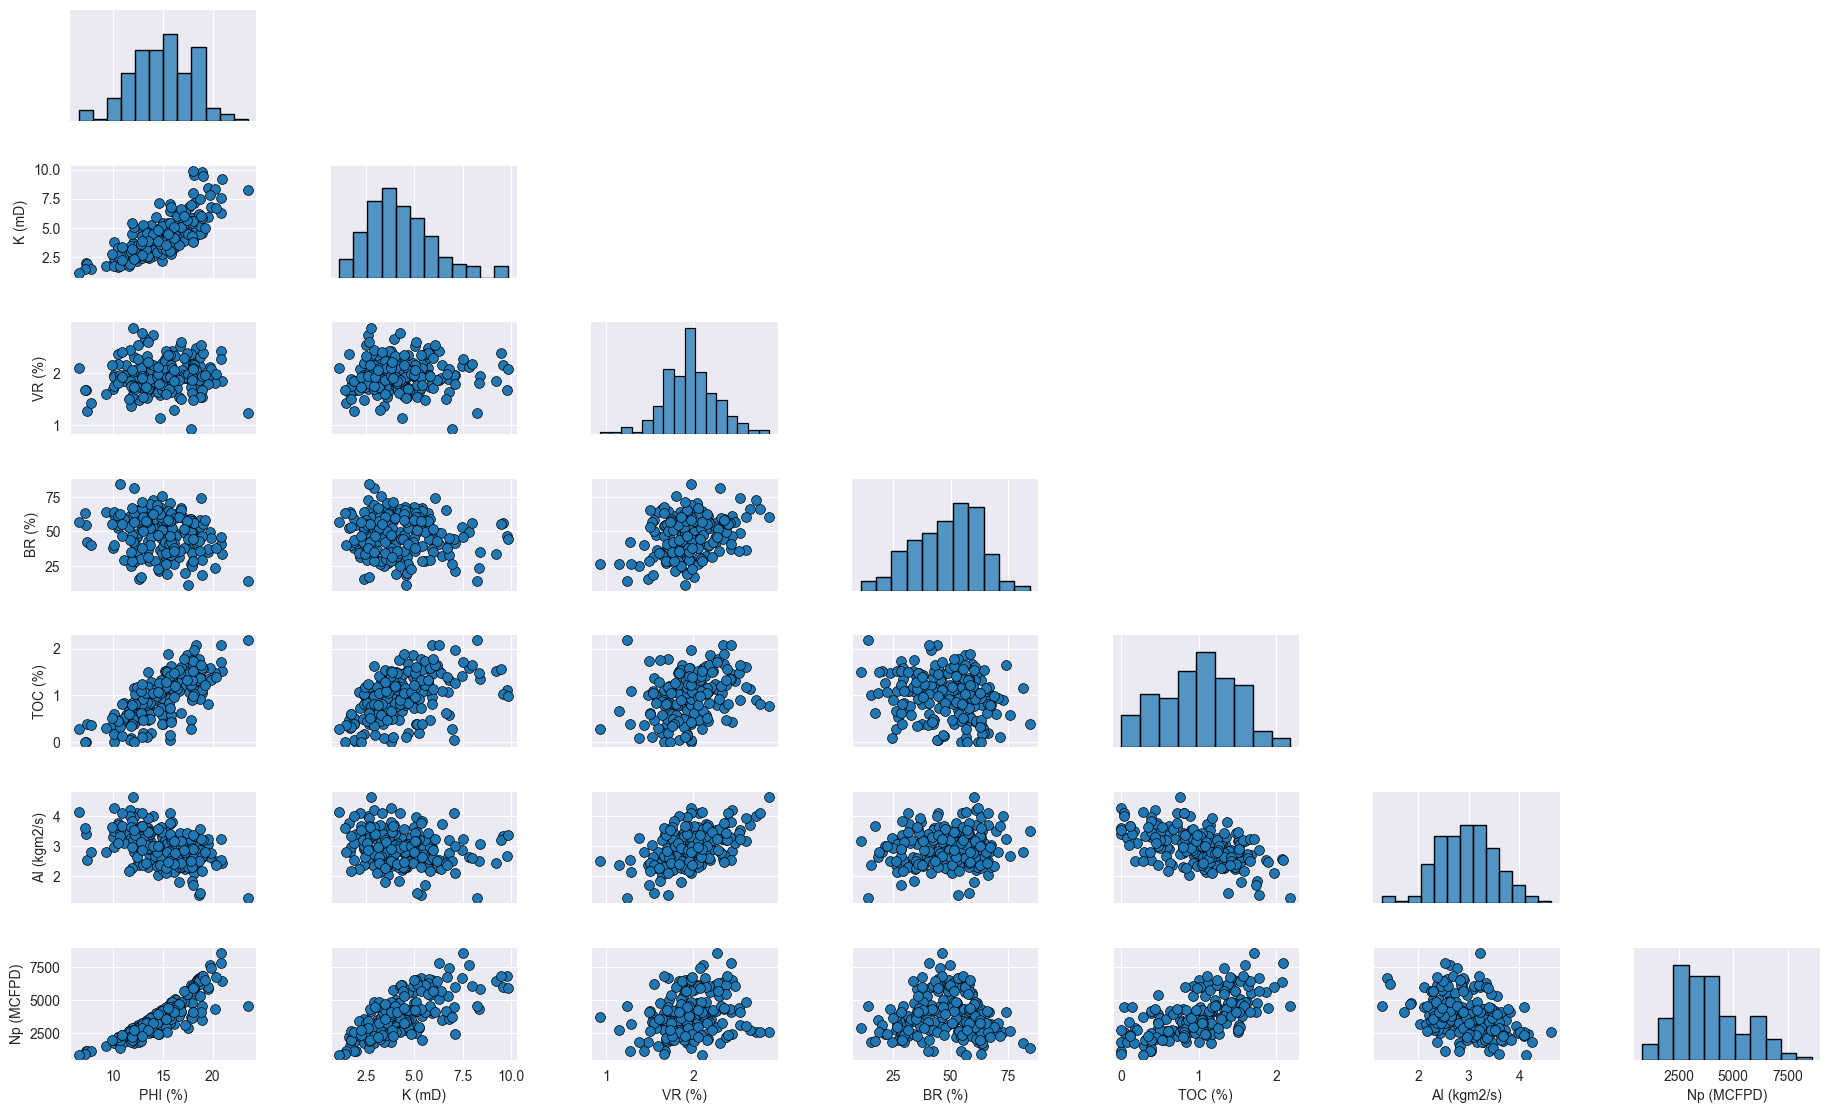

In [7]:
df = df.copy(deep=True)
df.rename(columns={'Por': 'PHI (%)','Perm': 'K (mD)', 'VR': 'VR (%)', 'Brittle': 'BR (%)',
                       'TOC': 'TOC (%)','AI': 'AI (kgm2/s)', 'Prod': 'Np (MCFPD)'}, inplace=True)

fn.matrix_scatter(df, ['PHI (%)', 'K (mD)', 'VR (%)', 'BR (%)', 'TOC (%)', 'AI (kgm2/s)',
                'Np (MCFPD)'], 0., 0., 1., 0.6, 0.4, 0.4, 'Scatterplot of all features', 1, hue_=None)

#### Feature Standardization

Since our model works with dissimilarity-based distance metric, it is imperative to standardize the predictor features to avoid predictor pulling effects due to scale variations

In [8]:
# 3D dataset curation
features = ['PHI (%)', 'AI (kgm2/s)', 'TOC (%)']
df_std = fn.standardizer(df, features=features, keep_only_std_features=True)
df = fn.standardizer(df, features=features, keep_only_std_features=False)

# Extract standardized feature columns to a list
ns_features = ['NS_PHI (%)', 'NS_AI (kgm2/s)', 'NS_TOC (%)']
df.head()

,Well,PHI (%),K (mD),AI (kgm2/s),BR (%),TOC (%),VR (%),Np (MCFPD),NS_PHI (%),NS_AI (kgm2/s),NS_TOC (%)
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819,-0.982256,-0.298603,0.352257
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063,-0.881032,0.444147,-0.213702
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259,-0.327677,1.841224,-0.213702
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854,0.903875,-0.599240,0.184565
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624,0.853263,0.373409,1.085907


#### Data Preparation 

Let's make an ordinal feature from the continuous production:

1. low
2. medium
3. high
4. very high 

production rates.  This will help us visualize the results as we proceed, we can look at wells with different levels of production projected into a variety of lower dimensional spaces with multidimensional scaling.

In [9]:
bins = [0,2500,5000,7500,10000]                # assign the production bins (these are the fence posts)
labels = ['low', 'med', 'high', 'vhigh']       # assign the labels
category = pd.cut(df['Np (MCFPD)'],bins,labels=labels)     # make the 1D array with the labels for our data
df['Np label'] = category                                # add the new ordinal production feature to our DataFrames
df.head()

,Well,PHI (%),K (mD),AI (kgm2/s),BR (%),TOC (%),VR (%),Np (MCFPD),NS_PHI (%),NS_AI (kgm2/s),NS_TOC (%),Np label
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819,-0.982256,-0.298603,0.352257,low
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063,-0.881032,0.444147,-0.213702,med
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259,-0.327677,1.841224,-0.213702,med
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854,0.903875,-0.599240,0.184565,high
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624,0.853263,0.373409,1.085907,med


Let's take a look at the matrix scatter plot of our 3 features and the production levels.

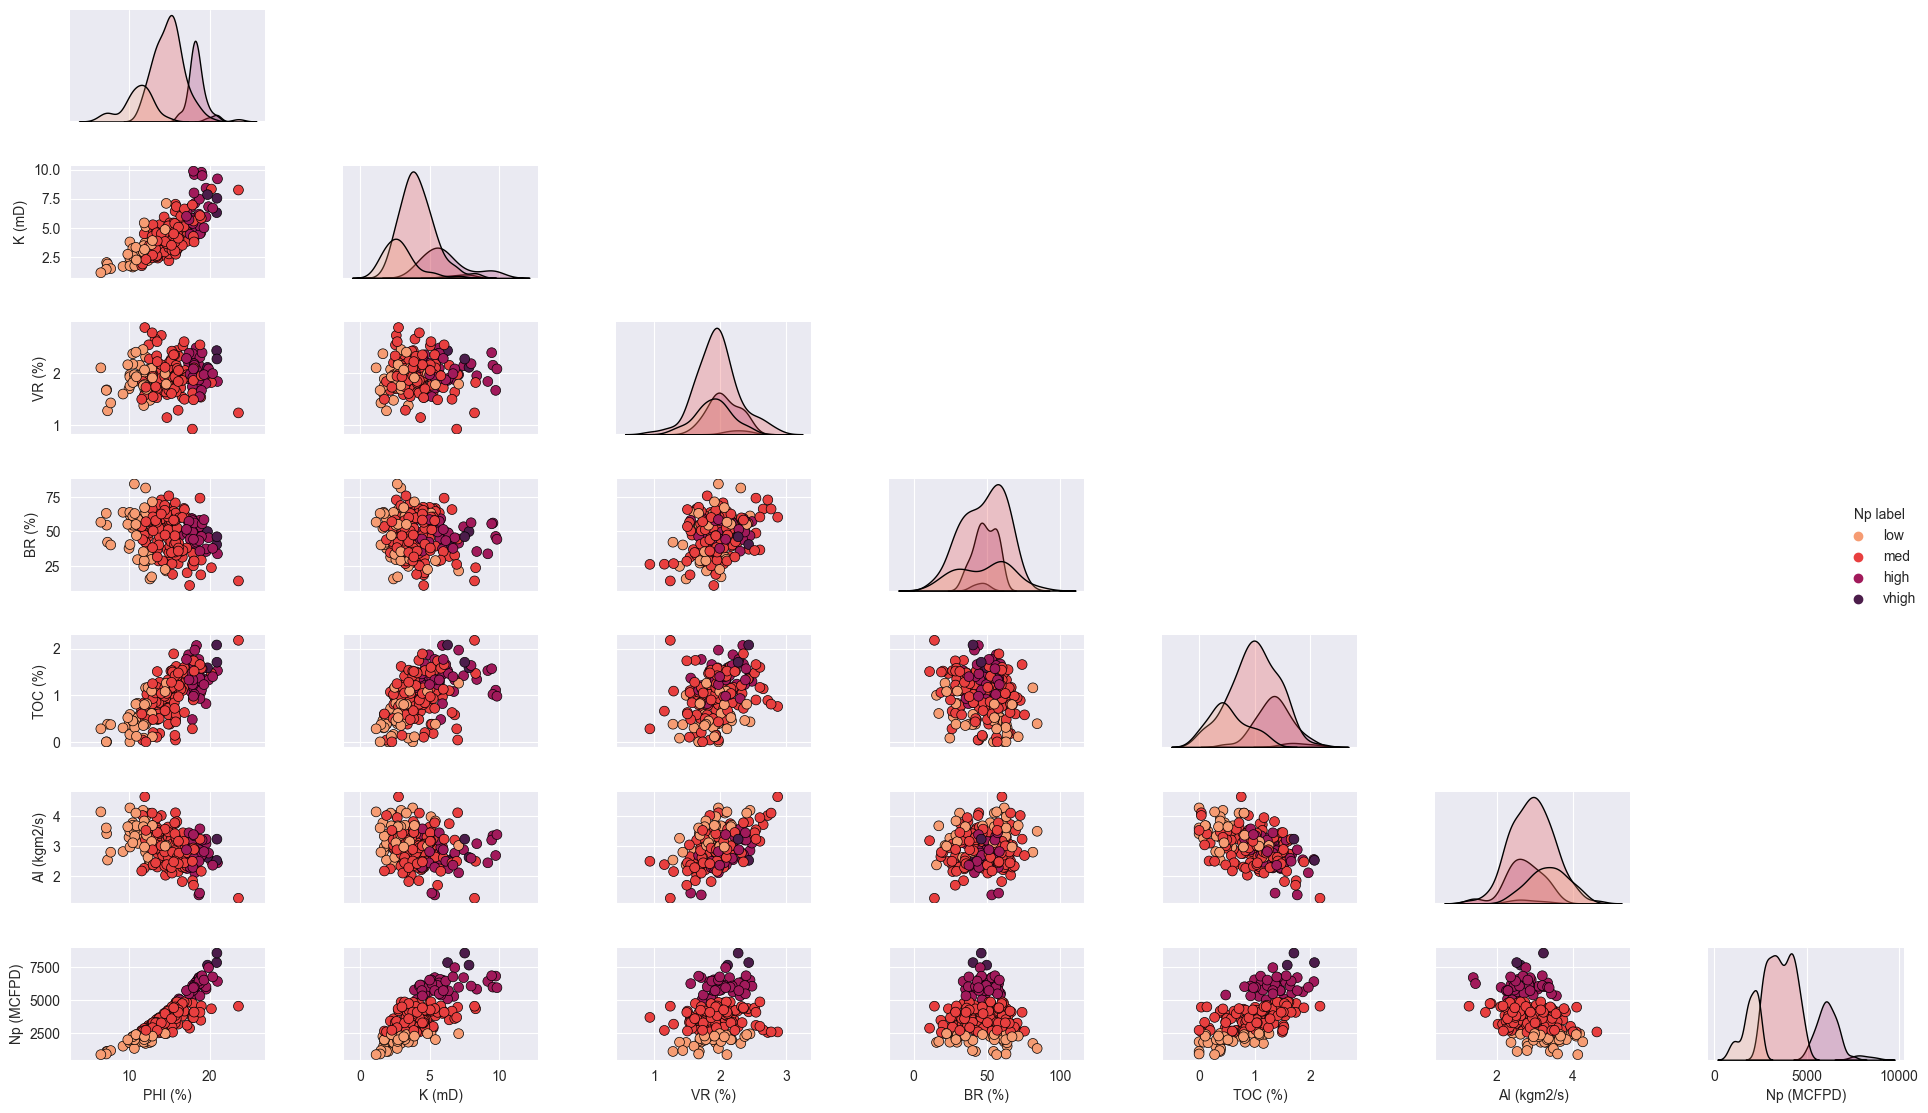

In [10]:
fn.matrix_scatter(df, ['PHI (%)', 'K (mD)',  'VR (%)', 'BR (%)', 'TOC (%)', 'AI (kgm2/s)',
                'Np (MCFPD)'], 0., 0., 1., 0.6, 0.4, 0.4, 'Scatterplot of all features coded by production levels', 1, hue_='Np label')

Visualize the matrix scatter plot of the 3 standardized features and the production levels.

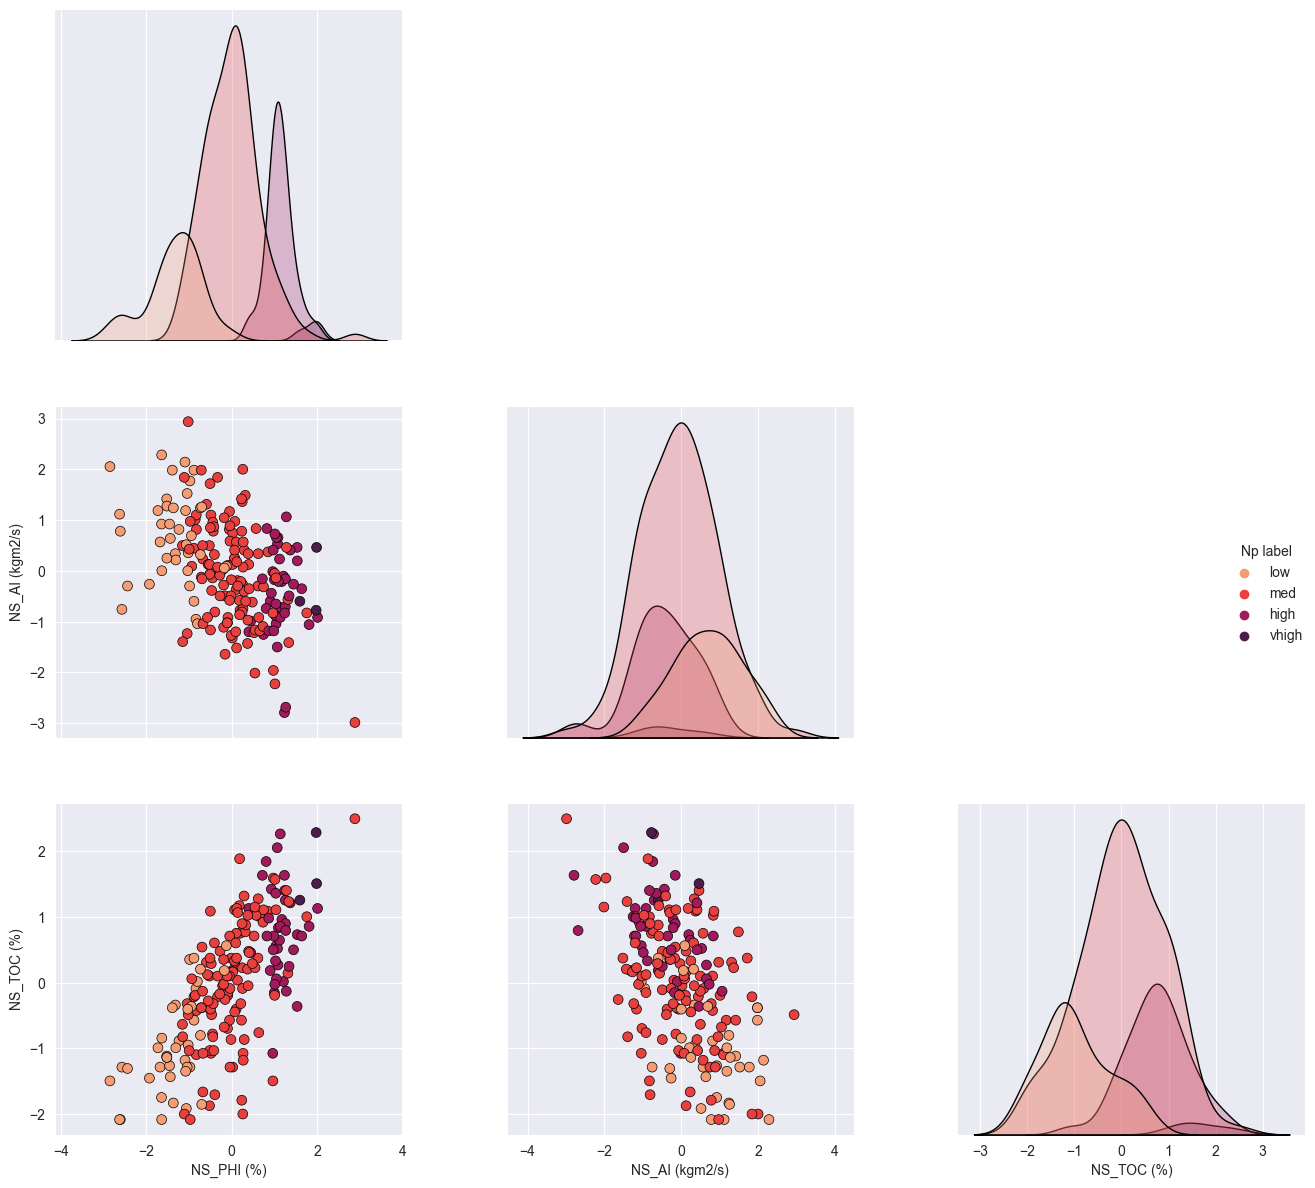

In [11]:
fn.matrix_scatter(df, ['NS_PHI (%)', 'NS_AI (kgm2/s)', 'NS_TOC (%)'], 0.0, 0.0, 1.5, 1.5, 0.3, 0.2,
                  'Scatterplot of standardized features colored by production levels', 1, hue_='Np label')

#### Multidimensional Scaling

The multidimensional scaling method follows the sample pattern as other scikit-learn methods, we instantiate, fit and then apply or transform.

Let's run multidimensional scaling on our subset of features ($m = 3$) and project to only 2 features ($p = 2$).

* we set the random_state for repeatability, everyone gets the same result from the iterative solution

* we use 20 random initializations, the best solution is selected to improve likelihood of selection of (or search resulting in) the global optimum and not a local optimum

* we use an increased number of max_iter to improve the convergence

# Section 1: n-case samples


To make the above problem more trackable and due to computational power consumption, we highlight the use of the proposed workflow, let's use 30 samples from the original dataset, then run MDS.

In [12]:
n = 30
df_subset = df.iloc[:n,:]
num_realizations = 100
base_seed = 42
start_seed = 1
stop_seed = 10000


random_seeds, all_real, calc_real, all_rmse, norm_stress = fn.run_rigid_MDS(df=df_subset, ns_features=ns_features, num_realizations=num_realizations, base_seed=base_seed, start_seed=start_seed, stop_seed=stop_seed)

Let's visualize the base case and three realizations using the same data

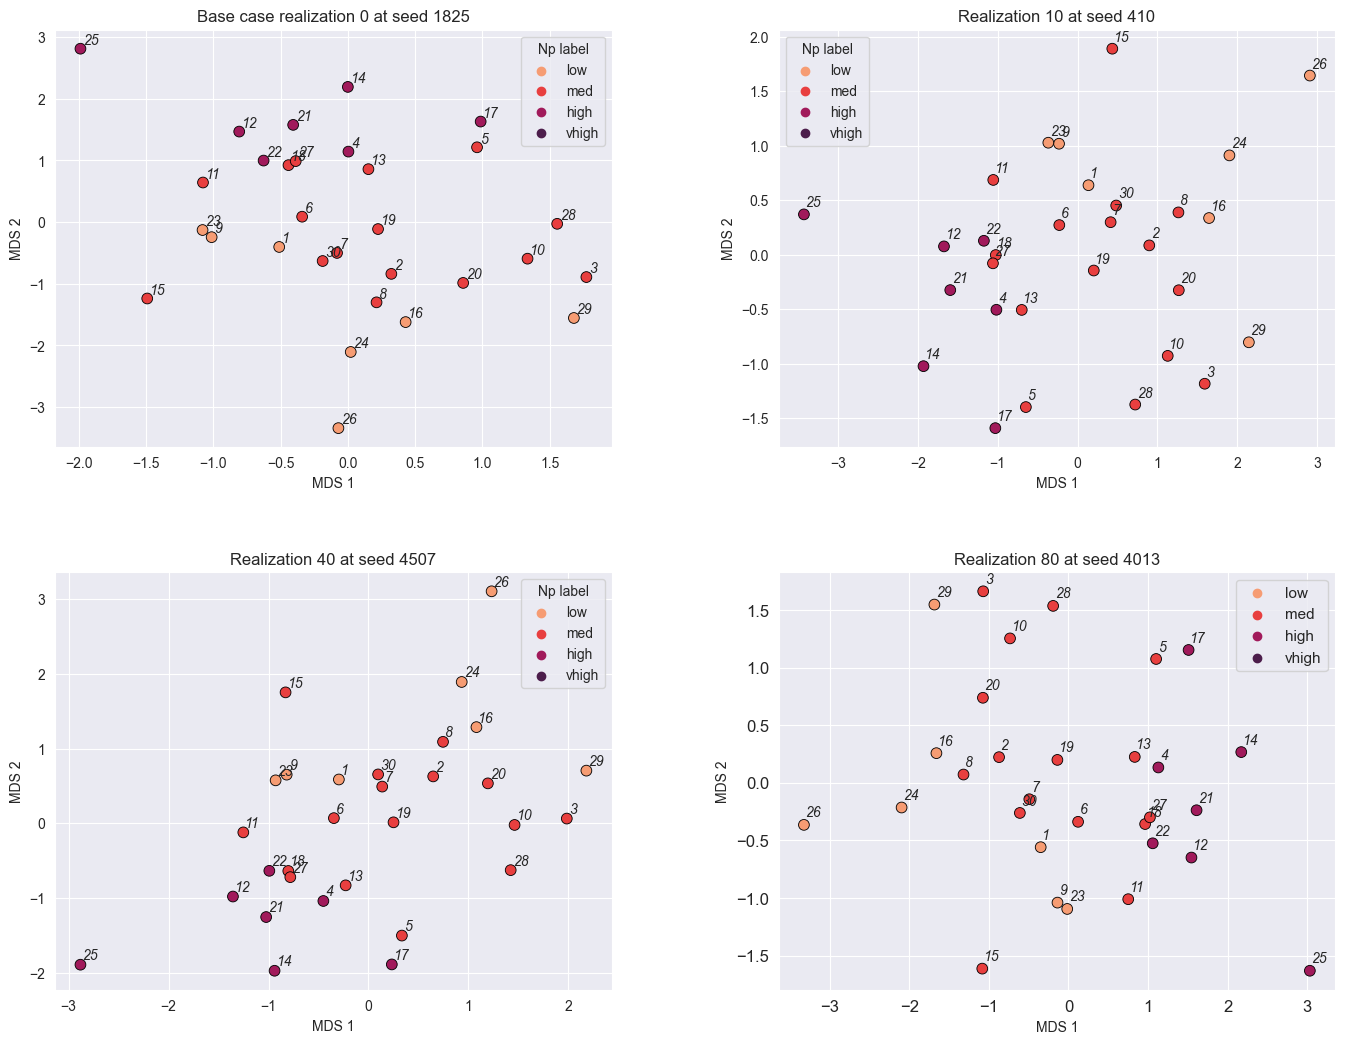

In [13]:
idx = 'Well'
response='Np label'
array1=all_real
r_list=[0, 10, 40, 80]
bc_idx =0 # base case index
Ax='MDS 1'
Ay='MDS 2'
title=['Base case realization ', 'Realization ', 'Realization ', 'Realization ']
x_off=0.02
y_off=0.07

#Set color map criteria
dpalette = sns.color_palette("rocket_r",n_colors = len(df[response].unique()))
palette = sns.color_palette("rocket")
cmap=dpalette

fn.real_plotter(df=df_subset, idx=idx, response=response, array1=array1, r_idx=r_list, random_seeds=random_seeds, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette)

Prior to stabilization of data points, let's visualize all realizations on the same plot to show that MDS is not rotation invariant.

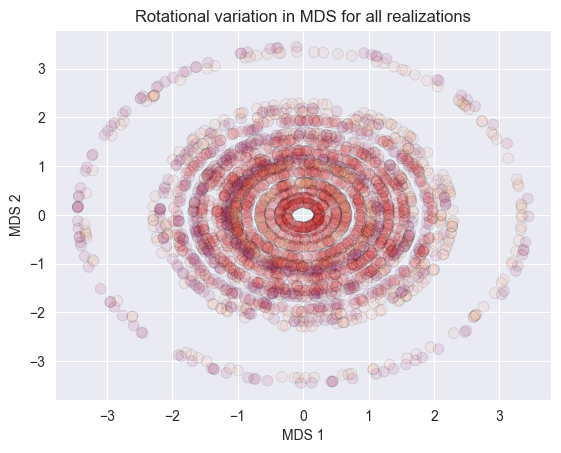

In [14]:
fn.bivariate_plotter(array=all_real, palette_=1, response='Np label', title='Rotational variation in MDS for all realizations',
                     plot_type='variation',dataframe=df_subset, Ax=Ax, Ay=Ay)

Now, we visualize the base case, previously chosen realizations and the stabilized solution.

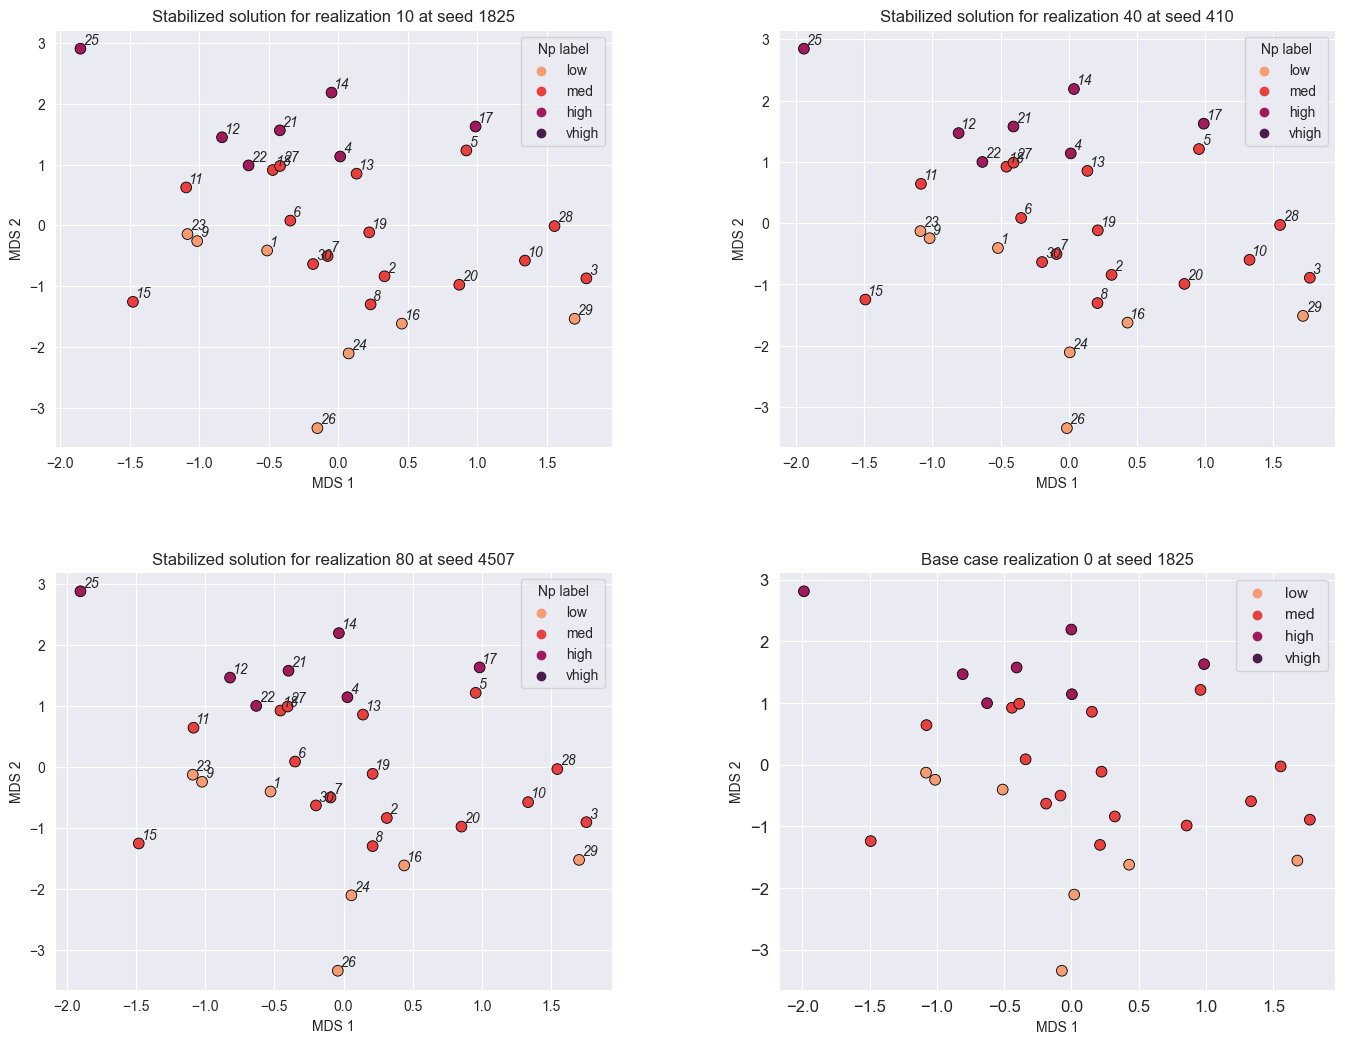

In [15]:
fn.real_plotter(df=df_subset, idx=idx, response=response, array1=array1, r_idx=r_list, random_seeds=random_seeds, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, array2=calc_real)

Visualize the 2D registration jitters in the calculated stabilized solution

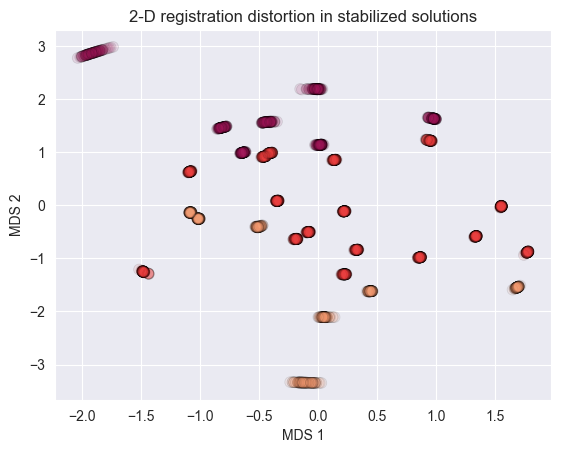

In [16]:
fn.bivariate_plotter(array=calc_real, palette_=1, response='Np label', title='2-D registration distortion in stabilized solutions',
                     plot_type='jitters',dataframe=df_subset, Ax=Ax, Ay=Ay)

Based on the scenarios above, we see that regardless of the seed or random state used when computing the MDS projections, similar stabilized solutions are obtained with distortions/jitters. Next, we average out the stabilized solutions obtained to get a more accurate location for the projections in the MDS space by obtaining the expectation of the ith sample over enough realizations as the ground truth projection coordinates.


Note that using the expectation of the stabilized solution helps removed effects from slight random offsets, perturbations, or distortions if any within the n-sample demonstration.

In [17]:
E = fn.expectation(array1=all_real, array2=calc_real, r_idx=bc_idx, Ax=Ax, Ay=Ay, verbose=True)

The effective variance of the base case is 2.6357 with a MDS 1 variance of 0.8234  and MDS 2 variance of 1.8123

The effective variance of the expected stabilized solution is 2.6352 with a MDS 1 variance of 0.8177  and MDS 2 variance of 1.8175


Visualize the expectation of the stabilized MDS projections over multiple realizations compared to the base case.

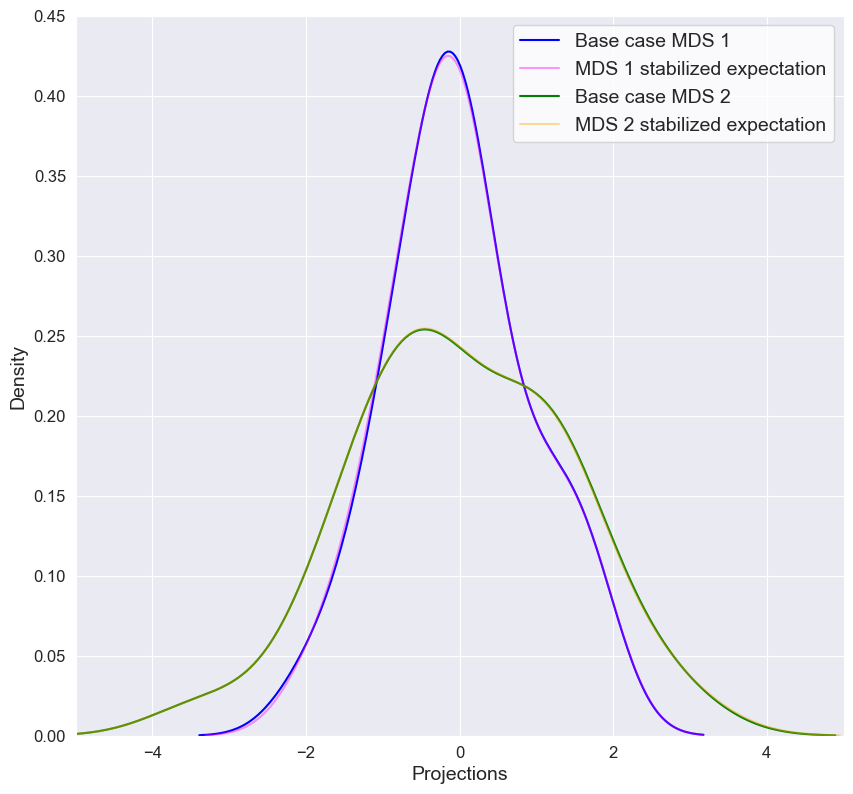

In [18]:
xmin = -5
xmax = 5
ymin = 0.0
ymax = 0.45

fn.E_plotter(array1=all_real, array_exp=E, r_idx=bc_idx, Lx=Ax, Ly=Ay, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

Visualize base case with expectation of the stabilized solution over all realizations for comparison.

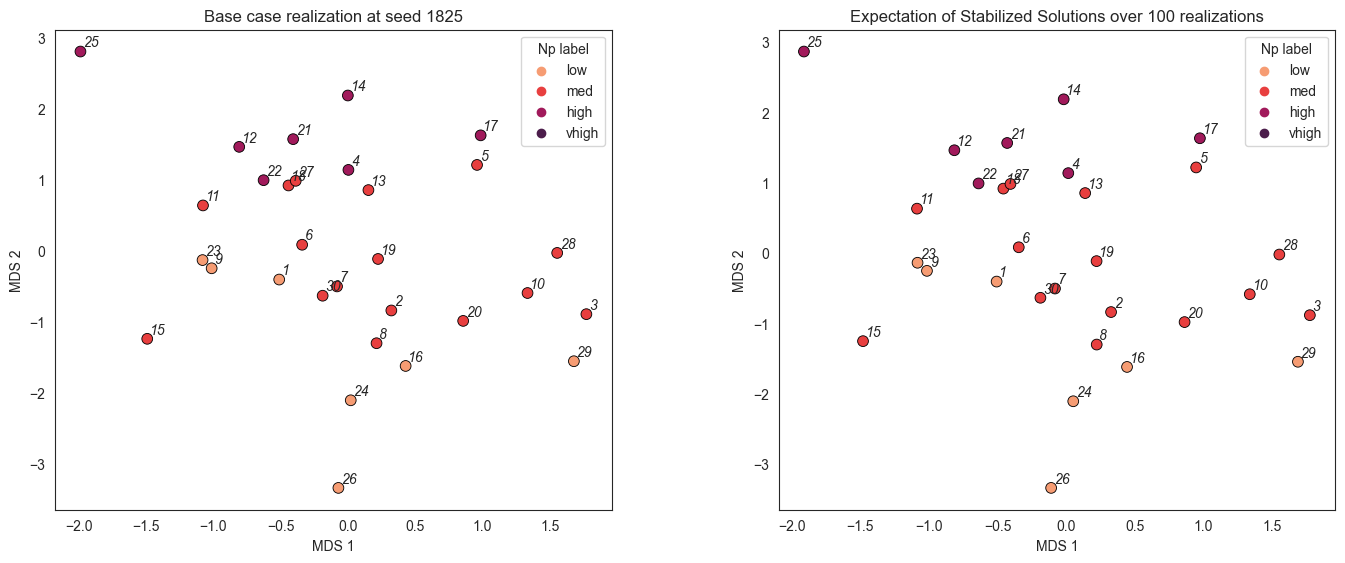

In [19]:
fn.compare_plot(df=df_subset, idx=idx, response=response, array1=all_real, r_idx=bc_idx, num_realizations=num_realizations, array_exp=E, random_seeds=random_seeds, Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, cmap=dpalette)

Let's check our model:

* we will calculate the original and projected pairwise distances between all the samples

* we will cross plot the original vs the projects pairwise distances

* we will plot the distribution of the ratio between projects / original pariwise distances

Now, let's calculate the distortion between original and projected pairwise distances between all samples. NEED TO UNDERSTAND INTERPRETATION OF STRESS HERE!

Distance Ratio, mean: 0.9677, standard deviation 0.1037.


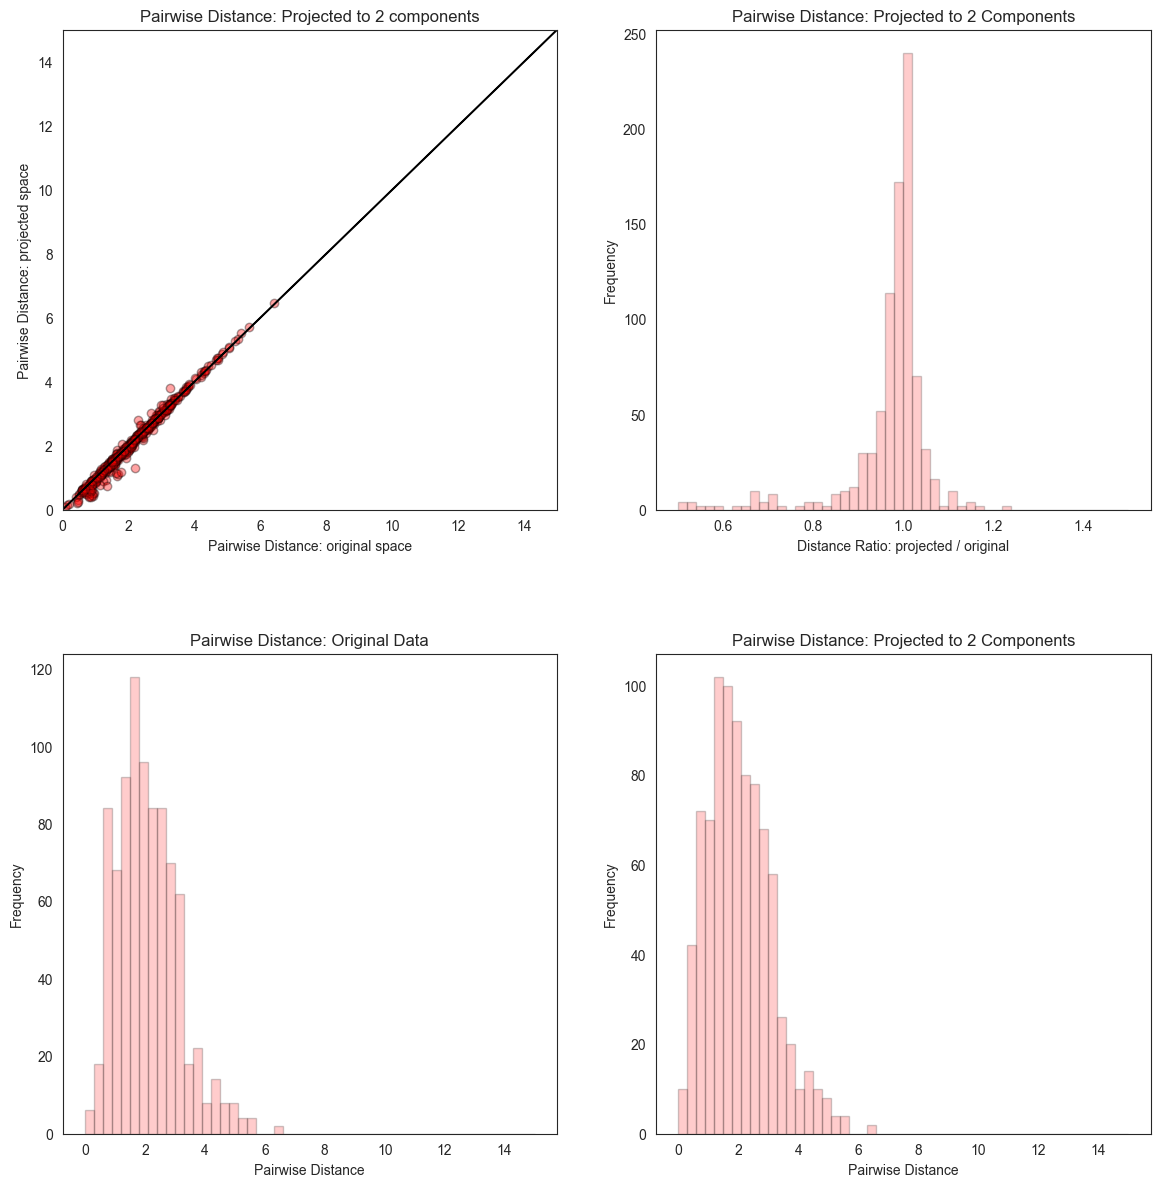

In [20]:
fn.visual_model_check(df_subset, ns_features,'Model check for n-case samples distortion', E)

In [ ]:
# Obtain dataframe with the standardized predictor features
actual_data = df_subset[ns_features]

# Grab the expectation of the stabilized solution
stabilized_expected_proj = np.transpose(E[:2, :])

# insert distortion visual
dists = euclidean_distances(actual_data, squared=False).ravel()
nonzero = dists != 0   # select only non-identical samples pairs
dists = dists[nonzero]
projected_dists = euclidean_distances(stabilized_expected_proj, squared=False).ravel()[nonzero]

plt.subplot(221)
plt.scatter(dists,projected_dists,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,15); plt.ylim(0,15)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to 2 components")

rates = projected_dists / dists
print("Distance Ratio, mean: %0.4f, standard deviation %0.4f." % (np.mean(rates), np.std(rates)))

plt.subplot(222)
plt.hist(rates, bins=50, range=(0.5, 1.5),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to 2 Components")

plt.subplot(223)
plt.hist(dists, bins=50, range=(0., 15.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Original Data")

plt.subplot(224)
plt.hist(projected_dists, bins=50, range=(0., 15.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to 2 Components")

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=2.3, wspace=0.2, hspace=0.3)
plt.show()

From the above, We projected to a 2 dimensional feature space and did a pretty good job preserving the pairwise distances between the samples.

In [ ]:
# # Test example to see if Convex checking function is working!
# sq_df = pd.DataFrame()
# sq_x = [2,10,10,2]
# sq_y = [1,1,9,9]
# sq_df["x"] = sq_x
# sq_df["y"] = sq_y
# sq_arr = sq_df.loc[:,["x","y"]].values
# sq_hull = ConvexHull(sq_arr)
# plt.plot(sq_arr[:,0],sq_arr[:,1],'o')
# ver = sq_arr[sq_hull.vertices]
# pol = Polygon(ver)
# bin = fn.is_convex_polygon(pol) # check if data is a strict convex polygon, if true, perform workflow else, DO WHAT?!
# print(bin)
# for simp in sq_hull.simplices:
#     plt.plot(sq_arr[simp, 0], sq_arr[simp, 1], 'r--') # k-
#     plt.fill(sq_arr[sq_hull.vertices, 0], sq_arr[sq_hull.vertices, 1], c='yellow', alpha=0.01)
# plt.show()

In [ ]:
# Using values of the n sample scenario create a convex hull of the points given, ie convex polygon for case n. Set this as an assertion!
my_points = all_real[0][:,:2] # all samples in projected space
hull = ConvexHull(my_points)

# Make point sample visuals
plt.scatter(my_points[:,0], my_points[:,1],marker='o', s=50, color='blue', edgecolors="black")
for index, label in enumerate(range(1,len(my_points[:,0])+1)):
    plt.annotate(label, (my_points[:,0][index]+0.01, my_points[:,1][index]+0.015), size=8, style='italic')

# Check for point in polygon
vertices = my_points[hull.vertices] # the anchors as an array
# plt.scatter(my_points[hull.vertices][:,0], my_points[hull.vertices][:,1]) # vertices only in normalized space
polygon = Polygon(vertices)

binary_bool = fn.is_convex_polygon(polygon) # check if data is a strict convex polygon, if true, perform workflow else, DO WHAT?!
print(binary_bool)
point = Point(all_real[0][6][0] ,all_real[0][6][1] ) # test point at index 6 i.e. a sample inside the polygon created from the data
point2 = Point(all_real[0][24][0] ,all_real[0][24][1] ) # test point at index 24 i.e. the 25th sample which is also an anchor in the data

# Make figure to visualize anchor points and convex hull polygon
for simplex in hull.simplices:
    plt.plot(my_points[simplex, 0], my_points[simplex, 1], 'r--') # k-
    plt.fill(my_points[hull.vertices, 0], my_points[hull.vertices, 1], c='yellow', alpha=0.01)
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.show()

In [ ]:
#Perform anchor stabilization without recalculation for n+1 case
# a = np.sort(hull.vertices) #vertice index
# b = np.sort(hull.vertices) #vertice index for n+1 case
#
# for i in range(0, len(a)):
#     if (len(a) == len(b)) and (a[i] == b[i]):
#         find the anchor points
#     else:
#         find the anchor points but ignore

In [ ]:
# For the n-dataset i.e., n=30 only wrt to the X's and Y
df_pred = df_subset.loc[:,['Por','AI', 'TOC','tProd']]
df_pred.head()

Visualize the marginal distribution of the predictors. this is shown because if the n+1 sample is chosen from the tails, the anchor points will change and the data will be impossible to stabilize.

In [ ]:
fig, ax = joypy.joyplot(df_pred, ylim='own', fade=True) #colormap=plt.cm.plasma, range_style='own',title="Gaussian kernel estimation of petrophysical features"
fig.suptitle("Marginal distribution of petrophysical features", y=1.0, size=14)
fig.set_size_inches(8,6)

In [ ]:
fig, ax = joypy.joyplot(df_pred, by='tProd', ylim='own', overlap=2, legend=True, fade=True, linewidth=1)
fig.suptitle("Marginal distribution of petrophysical features conditioned on production levels", y=1.0, size=14)
fig.set_size_inches(8,6)




# Section 2:  For n+ 1 Case
<br>

Let's add a sample to the data yielding a n+1 samples and re-run the proposed workflow using n+1 samples on previous data

In [ ]:
n2 = 31
df_subset2 = df.iloc[:n2,:]

random_seeds2, all_real2, calc_real2, all_rmse2, norm_stress2 = fn.run_rigid_MDS(df=df_subset2, ns_features=ns_features, num_realizations=num_realizations, base_seed=base_seed, start_seed=start_seed, stop_seed=stop_seed)

In [ ]:
#View the parameters of the i-th sample added
df.iloc[n2,:]

In [ ]:
# how to enforce anchor in R2 for n+1 case done! First, create a convex hull of the points given, ie convex polygon for n+1 case. Set this as an assertion!
my_points2 = all_real2[0][:,:2]
hull2 = ConvexHull(my_points2)
# Create points for scatter plot visual
plt.scatter(my_points2[:n2-1,0], my_points2[:n2-1,1],marker='o', s=50, color='blue', edgecolors="black")
plt.scatter(my_points2[n2-1,0], my_points2[n2-1,1], marker='*', color='k', s=90)
for index, label in enumerate(range(1,len(my_points2[:,0])+1)):
    plt.annotate(label, (my_points2[:,0][index]+0.05, my_points2[:,1][index]+0.015), size=8, style='italic')

# Check for point in polygon
vertices2 = my_points2[hull2.vertices]
# plt.scatter(my_points2[hull2.vertices][:,0], my_points2[hull2.vertices][:,1]) # vertices only in normalized space
polygon2 = Polygon(vertices2)

binary_bool2 = fn.is_convex_polygon(polygon2) # check if data is a strict convex polygon, if true, perform workflow else, DO WHAT?!
print(binary_bool2)
point_2 = Point(all_real2[0][6][0] ,all_real2[0][6][1] ) # test point at index 6 i.e. a sample inside the polygon created from the data
point2_2 = Point(all_real2[0][24][0] ,all_real2[0][24][1] ) # test point at index 24 i.e. the 25th sample which is also an anchor in the data

# Make figure to visualize anchor points shape and convex hull polygon
for simplex2 in hull2.simplices:
    plt.plot(my_points2[simplex2, 0], my_points2[simplex2, 1], 'r--') # k-
    plt.fill(my_points2[hull2.vertices, 0], my_points2[hull2.vertices, 1], c='yellow', alpha=0.01)
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.show()

#Perhaps color by production cmap 'dpalette created before'?

In [ ]:
# Obtain the anchor points for n and n+1 scenarios
vertices_index = hull.vertices
vertices2_index = hull2.vertices
# np.nonzero(np.isin(vertices_index, vertices2_index))
# np.isin(vertices_index, vertices2_index)

# Make sure the indexes of the anchor points from the data and check if the anchor points from scenario n is in scenario n+1 array as well
data_index_present = vertices_index[np.isin(vertices_index, vertices2_index)]

# Get anchors for n scenario
case1_anchors = my_points[vertices_index]
anchors1 = np.column_stack((case1_anchors[:, 0],case1_anchors[:, 1],[0]*len(case1_anchors)))
#plt.scatter(case1_anchors[:,0],case1_anchors[:,1])

# Get anchors for n+1 scenario
case2_anchors = my_points2[vertices2_index]
anchors2 = np.column_stack((case2_anchors[:, 0],case2_anchors[:, 1],[0]*len(case2_anchors)))
#plt.scatter(case2_anchors[:,0],case2_anchors[:,1])

# Recover the rotation and translation matrices R,t, respectively for the anchor points in n+1 to match anchors in the n case scenario
R_anchors, t_anchors = fn.rigid_transform_3D(np.transpose(anchors2), np.transpose(anchors1))

# Compare the recovered R and t with the original by creating a new coordinate scheme via prior solutions of R, t
new_coord_anchors = (R_anchors@np.transpose(anchors2)) + t_anchors

# Find the rmse as an error check between estimated anchor points in n+1 scenario and anchor points in n scenario
rmse_err_anchors = fn.rmse(new_coord_anchors, anchors1)
print(rmse_err_anchors)

# Create a convex hull polygon of the normalized stabilized anchor points. Set this as an assertion!
new_coordanchor = np.transpose(new_coord_anchors[:2,:])

In [ ]:
### Visualization of base case and stabilized solution
fig , [ax0, ax1, ax2] = plt.subplots(1,3)

# For base case anchors i.e. in n scenario
ax0.scatter(anchors1[:,0], anchors1[:,1], marker='o', s=50, color='blue', edgecolors="black")
for index, label in enumerate(range(1,len(anchors1)+1)):
    ax0.annotate(label, (anchors1[:,0][index]+0.05, anchors1[:,1][index]+0.05), size=10, style='italic')
ax0.set_aspect('auto')
ax0.set_title('Anchors from n sample scenario', size=12)
ax0.set_xlabel('MDS 1',size=12)
ax0.set_ylabel('MDS 2',size=12)
ax0.tick_params(axis='both', which='major', labelsize=12)

# For the realization anchors at n+1 scenario
ax1.scatter(anchors2[:,0], anchors2[:,1], marker='o', s=50, color='blue', edgecolors="black")
for index, label in enumerate(range(1,len(anchors2)+1)):
    ax1.annotate(label, (anchors2[:,0][index]+0.05, anchors2[:,1][index]+0.05), size=10, style='italic')
ax1.set_aspect('auto')
ax1.set_title('Anchors from n+1 sample scenario', size=12)
ax1.set_xlabel('MDS 1',size=12)
ax1.set_ylabel('MDS 2',size=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

## Visualize the normalized stabilized anchor points
ax2.scatter(new_coordanchor[:,0], new_coordanchor[:,1], marker='o', s=50, color='blue', edgecolors="black")
for index, label in enumerate(range(1,len(new_coordanchor[:,0])+1)):
    ax2.annotate(label, (new_coordanchor[:,0][index]+0.05, new_coordanchor[:,1][index]+0.05), size=10, style='italic')
ax2.set_aspect('auto')
ax2.set_title('Stabilized anchor solution', size=12)
ax2.set_xlabel('MDS 1',size=12)
ax2.set_ylabel('MDS 2',size=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3., top=1.3, wspace=0.25, hspace=0.3)
plt.savefig( 'Anchor sets & Stabilized Anchor set Solution.png', dpi=300, bbox_inches='tight')
plt.show()

Now, use the R and t matrix gotten from the stabilized anchor solution taking cognizant of reflection, and apply it to all samples in the n+1 scenario to obtain the now stabilized solution

In [ ]:
my_points2_anchors = np.column_stack((my_points2[:, 0],my_points2[:, 1],[0]*len(my_points2)))
new_coord_alldata = (R_anchors@np.transpose(my_points2_anchors)) + t_anchors
new_coord_alldata_ = np.transpose(new_coord_alldata[:2,:])

# Visualize the stabilized n+1 scenario for all samples
plt.scatter(new_coord_alldata_[:n2-1,0], new_coord_alldata_[:n2-1,1], marker='o', s=50, color='blue', edgecolors="black")
plt.scatter(new_coord_alldata_[n2-1,0], new_coord_alldata_[n2-1,1], marker='*', color='k', s=90)
for index, label in enumerate(range(1,len(new_coord_alldata_[:,0])+1)):
    plt.annotate(label, (new_coord_alldata_[:,0][index]+0.05, new_coord_alldata_[:,1][index]+0.05), size=8, style='italic')
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.show() # Perhaps color by production cmap 'dpalette created before'?

Let's check our model:

* we will calculate the original and projected pairwise distances between all the samples

* we will cross plot the original vs the projects pairwise distances

* we will plot the distribution of the ratio between projects / original pariwise distances

Now, let's calculate the distortion between original and projected pairwise distances between all samples.

In [ ]:
# Obtain dataframe with the standardized predictor features
actual_data2 = df_subset2[ns_features]

# Grab the stabilized solution of n+1 scenario
stabilized_expected_proj2 = new_coord_alldata_.copy()

# insert  distortion
dists2 = euclidean_distances(actual_data2, squared=False).ravel()
nonzero2 = dists2 != 0   # select only non-identical samples pairs
dists2 = dists2[nonzero2]
projected_dists2 = euclidean_distances(stabilized_expected_proj2, squared=False).ravel()[nonzero2]

plt.subplot(221)
plt.scatter(dists2,projected_dists2,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,15); plt.ylim(0,15)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to 2 components")

rates2 = projected_dists2 / dists2
print("Distance Ratio, mean: %0.4f, standard deviation %0.4f." % (np.mean(rates2), np.std(rates2)))

plt.subplot(222)
plt.hist(rates2, bins=50, range=(0.5, 1.5),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to 2 Components")

plt.subplot(223)
plt.hist(dists2, bins=50, range=(0., 15.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Original Data")

plt.subplot(224)
plt.hist(projected_dists2, bins=50, range=(0., 15.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to 2 Components")

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=2.3, wspace=0.2, hspace=0.3)
plt.show()

Visualize the 2D registration jitters in n+1 case

In [ ]:
for i in range(0,len(calc_real2)):
    mds1_vec = np.transpose(calc_real2[i][0,:])
    mds2_vec = np.transpose(calc_real2[i][1,:])
    sns.scatterplot(x=mds1_vec, y=mds2_vec, hue=df_subset2['tProd'], s=60, markers='o', alpha=0.01,
                    palette=dpalette,edgecolor="black", legend=False)

# Section 3

What if we use expected stabilized solution for n+1 scenario to get the anchor points then compare to previous section results to compare, any significant changes or just more computationally intensive?

In [ ]:
## Parameters are repeated so, I didn't redeclare.
# idx = 'Well'
# response='tProd'
# r_list=[0, 10, 40, 80]
# Ax='MDS 1'
# Ay='MDS 2'
# title=['Base case realization ', 'Realization ', 'Realization ', 'Realization ']
# x_off=0.02
# y_off=0.07
# cmap=dpalette

Visualize base case and three realizations

In [ ]:
array2 = all_real2
new_idx =0 # base case index for n+1 scenario
fn.real_plotter(df=df_subset2, idx=idx, response=response, array1=array2, r_idx=r_list, random_seeds=random_seeds2, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette)

Visualize base case, previously chosen realizations and stabilized solution for n+1 scenario

In [ ]:
fn.real_plotter(df=df_subset2, idx=idx, response=response, array1=array2, r_idx=r_list, random_seeds=random_seeds2, Ax=Ax, Ay=Ay , title=title, x_off=x_off, y_off=y_off,cmap=dpalette, array2=calc_real2)

Based on the scenarios above, we see that regardless of the seed or random state used when computing the MDS projections, the similar stabilized solutions are obtained. Next, we average out the stabilized solutions obtained to get a more accurate location for the projections in the MDS space by obtaining the expectation of the ith sample over enough realizations as the ground truth projection coordinates.


Note that using the expectation of the stabilized solution helps removed effects from slight random offsets, perturbations, or distortions if any within the n+1-sample demonstration.

In [ ]:
E2 = fn.expectation(array1=all_real2, array2=calc_real2, r_idx=new_idx, Ax=Ax, Ay=Ay, verbose=True)

Visualize the expectation of the stabilized MDS projections for n+1 samples over multiple realizations compared to the base case from using new_idx

In [ ]:
xmin2 = -5
xmax2 = 5
ymin2 = 0.0
ymax2 = 0.45

fn.E_plotter(array1=all_real2, array_exp=E2, r_idx=new_idx, Lx=Ax, Ly=Ay, xmin=xmin2, xmax=xmax2, ymin=ymin2, ymax=ymax2)

Visualize the base case with expectation of the stabilized solution over all realizations for comparison to view distortions if any

In [ ]:
# Ensure random_seeds2 is in the same order
fn.compare_plot(df=df_subset2, idx=idx, response=response, array1=all_real2, r_idx=new_idx, num_realizations=num_realizations, array_exp=E2, random_seeds=random_seeds2, Ax=Ax, Ay=Ay, x_off=x_off, y_off=y_off, cmap=dpalette)

Find the convex hull polygon of the expected stabilized solution for all realizations in the n+1 scenario

In [ ]:
# how to enforce anchor in R2 for n+1 case done! and create a convex hull of the stabilized solution points, ie convex polygon for n+1 case. Set this as an assertion!
stabilized_expected_all = np.transpose(E2[:2,:])
my_points_expected = stabilized_expected_all.copy()
hull_expected = ConvexHull(my_points_expected)

# Visualize plots
plt.scatter(my_points_expected[:n2-1,0], my_points_expected[:n2-1,1],marker='o', s=50, color='blue', edgecolors="black")
plt.scatter(my_points_expected[n2-1,0], my_points_expected[n2-1,1],marker='*', s=90, color='k', edgecolors="black")
for index, label in enumerate(range(1,len(my_points_expected[:,0])+1)):
    plt.annotate(label, (my_points_expected[:,0][index]+0.01, my_points_expected[:,1][index]+0.015), size=8, style='italic')

# Check for point in polygon
vertices_expected = my_points_expected[hull_expected.vertices]
# plt.scatter(my_points_expected[hull_expected.vertices][:,0], my_points_expected[hull_expected.vertices][:,1])
polygon_expected = Polygon(vertices_expected)

binary_bool_expected = fn.is_convex_polygon(polygon_expected) # check if data is a strict convex polygon, if true, perform workflow else, DO WHAT?!
print(binary_bool_expected)

# Make figure to visualize anchor points and convex hull polygon
for simplex_expected in hull_expected.simplices:
    plt.plot(my_points_expected[simplex_expected, 0], my_points_expected[simplex_expected, 1], 'r--') # k-
    plt.fill(my_points_expected[hull_expected.vertices, 0], my_points_expected[hull_expected.vertices, 1], c='yellow', alpha=0.01)
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.show()

In [ ]:
# Obtain the anchor points for n and n+1 scenarios using the expected stabilized solutions for both
vertices_expected_index = hull_expected.vertices


# Make sure the indexes of the anchor points from the data and check if the anchor points from scenario n is in scenario n+1 array as well
expected_data_index_present = vertices_expected_index[np.isin(vertices_index, vertices_expected_index)]


# Get anchors for n+1 scenario in expected stabilized solution
case2_anchors_expected = my_points_expected[vertices_expected_index]
anchors2_expected = np.column_stack((case2_anchors_expected[:, 0],case2_anchors_expected[:, 1],[0]*len(case2_anchors_expected)))


# Recover the rotation and translation matrices R,t, respectively for the anchor points in n+1 to match anchors in the n case scenario
R_anchors_expected, t_anchors_expected = fn.rigid_transform_3D(np.transpose(anchors2_expected), np.transpose(anchors1))

# Compare the recovered R and t with the original by creating a new coordinate scheme via prior solutions of R, t
new_coord_anchors_expected = (R_anchors_expected@np.transpose(anchors2_expected)) + t_anchors_expected

# Find the rmse as an error check between estimated anchor points in n+1 scenario and anchor points in n scenario
rmse_err_anchors_expected = fn.rmse(new_coord_anchors_expected, anchors1)
print(rmse_err_anchors_expected)

# Create a convex hull polygon of the expected stabilized anchor points. Set this as an assertion!
new_coordanchor_expected = np.transpose(new_coord_anchors_expected[:2,:])

In [ ]:
### Visualization of base case and stabilized solution
fig , [ax0, ax1, ax2] = plt.subplots(1,3)

# For base case anchors i.e. in n scenario # USE STABILIZED EXPECTATION ANCHORS
ax0.scatter(anchors1[:,0], anchors1[:,1], marker='o', s=50, color='blue', edgecolors="black")
for index, label in enumerate(range(1,len(anchors1)+1)):
    ax0.annotate(label, (anchors1[:,0][index]+0.05, anchors1[:,1][index]+0.05), size=10, style='italic')
ax0.set_aspect('auto')
ax0.set_title('Expected Stabilized Anchors from n sample scenario', size=12)
ax0.set_xlabel('MDS 1',size=12)
ax0.set_ylabel('MDS 2',size=12)
ax0.tick_params(axis='both', which='major', labelsize=12)

# For the realization anchors at n+1 scenario base case
ax1.scatter(anchors2[:,0], anchors2[:,1], marker='o', s=50, color='blue', edgecolors="black")
for index, label in enumerate(range(1,len(anchors2)+1)):
    ax1.annotate(label, (anchors2[:,0][index]+0.05, anchors2[:,1][index]+0.05), size=10, style='italic')
ax1.set_aspect('auto')
ax1.set_title('Anchors from n+1 sample scenario', size=12)
ax1.set_xlabel('MDS 1',size=12)
ax1.set_ylabel('MDS 2',size=12)
ax1.tick_params(axis='both', which='major', labelsize=12)

## Visualize the expected stabilized anchor points
ax2.scatter(new_coordanchor_expected[:,0], new_coordanchor_expected[:,1],  marker='o', s=50, color='blue', edgecolors="black")
for index, label in enumerate(range(1,len(new_coordanchor_expected[:,0])+1)):
    ax2.annotate(label, (new_coordanchor_expected[:,0][index]+0.05, new_coordanchor_expected[:,1][index]+0.05), size=10, style='italic')
ax2.set_aspect('auto')
ax2.set_title('Expected stabilized anchor solution', size=12)
ax2.set_xlabel('MDS 1',size=12)
ax2.set_ylabel('MDS 2',size=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3., top=1.3, wspace=0.25, hspace=0.3)
plt.savefig( 'Expected Anchor sets & Stabilized Anchor set Solution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Use the R and t gotten from the expected stabilized anchor solution, and apply it to all samples in the n+1 scenario.
my_points_expected_anchors = np.column_stack((my_points_expected[:, 0],my_points_expected[:, 1],[0]*len(my_points_expected)))
new_coord_alldata_expected = (R_anchors_expected@np.transpose(my_points_expected_anchors)) + t_anchors_expected
new_coord_alldata_expected_ = np.transpose(new_coord_alldata_expected[:2,:])


# Visualize the stabilized n+1 scenario for all samples
plt.scatter(new_coord_alldata_expected_[:n2-1,0], new_coord_alldata_expected_[:n2-1,1], marker='o', s=50, color='blue', edgecolors="black")
plt.scatter(new_coord_alldata_expected_[n2-1,0], new_coord_alldata_expected_[n2-1,1], marker='*', s=90, color='k', edgecolors="black")

for index, label in enumerate(range(1,len(new_coord_alldata_expected_[:,0])+1)):
    plt.annotate(label, (new_coord_alldata_expected_[:,0][index]+0.05, new_coord_alldata_expected_[:,1][index]+0.05), size=8, style='italic')
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.show()

_Let's check our model:

* we will calculate the original and projected pairwise distances between all the samples

* we will cross plot the original vs the projects pairwise distances

* we will plot the distribution of the ratio between projects / original pariwise distances

Now, let's calculate the distortion between original and projected pairwise distances between all samples. NEED TO UNDERSTAND INTERPRETATION OF STRESS HERE!

In [ ]:
# Grab the expected stabilized solution of n+1 scenario
stabilized_expected_proj_E = new_coord_alldata_expected_.copy()

# insert distortion a loss function computation
dists_expected = euclidean_distances(actual_data2, squared=False).ravel()
nonzero_expected = dists_expected != 0   # select only non-identical samples pairs
dists_expected = dists_expected[nonzero_expected]
projected_dists_expected = euclidean_distances(stabilized_expected_proj_E, squared=False).ravel()[nonzero2]

plt.subplot(221)
plt.scatter(dists_expected,projected_dists_expected,c='red',alpha=0.2,edgecolor = 'black')
plt.arrow(0,0,200,200,width=0.02,color='black',head_length=0.0,head_width=0.0)
plt.xlim(0,15); plt.ylim(0,15)
plt.xlabel("Pairwise Distance: original space")
plt.ylabel("Pairwise Distance: projected space")
plt.title("Pairwise Distance: Projected to 2 components")

rates_expected = projected_dists_expected / dists_expected
print("Distance Ratio, mean: %0.4f, standard deviation %0.4f." % (np.mean(rates_expected), np.std(rates_expected)))

plt.subplot(222)
plt.hist(rates_expected, bins=50, range=(0.5, 1.5),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Distance Ratio: projected / original")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to 2 Components")

plt.subplot(223)
plt.hist(dists_expected, bins=50, range=(0., 15.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Original Data")

plt.subplot(224)
plt.hist(projected_dists_expected, bins=50, range=(0., 15.),color = 'red', alpha = 0.2, edgecolor='k')
plt.xlabel("Pairwise Distance")
plt.ylabel("Frequency")
plt.title("Pairwise Distance: Projected to 2 Components")

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.7, top=2.3, wspace=0.2, hspace=0.3)
plt.show()

In [ ]:
print("The average, minimum, and maximum stress values for the realizations in the n-scenario are ", round(np.mean(norm_stress),5) , round(np.min(norm_stress),5)
      , round(np.max(norm_stress),5))

print("The average, minimum, and maximum stress values for the realizations in the n-scenario are ", round(np.mean(norm_stress2),5) , round(np.min(norm_stress2),5)
      , round(np.max(norm_stress2),5))

## Ademide (Midé) Mabadeje, Ph.D.Candidate, University of Texas at Austin 


Midé is currently working on Geostatistics – spatial data analytics, where she is creating novel workflows and data-driven algorithms to debias and reduce uncertainty in subsurface prediction models. Her Ph.D. research revolves around creating new data analytics and ML workflows to address various sources of spatial and/or subsurface bias to obtain representative sampling to impact decision making and economic development. 

For more about Midé check out these links:

####  [GitHub](https://github.com/Mide478) | [GoogleScholar](https://scholar.google.com/citations?user=9nksjzQAAAAJ&hl=en&oi=ao)  | [LinkedIn](https://www.linkedin.com/in/ademidemabadeje)


I am open to internships and collaborations in related research areas and disciplines underlined with spatial statistics. I can be reached at ademidemabadeje@austin.utexas.edu.

## Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


<br>


We hope this was helpful,

*Midé & Michael*



Midé Mabadeje, Graduate Research Assistant The Hildebrand Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin


1. To measure distortion between same samples in n, and n+1 samples over the same number of realizations, we find the stress, and make a figure of stress versus n tried for n=[1:N] and also compute the distortion ratio,  n+1/n. We hypothesize that as n increases, the plot of distortion version is linear wrt n+1 samples, however as n reduces, distortion becomes significant and it follows an exponential form.'


2. Repeat for N on support [10, 100]


3. Try different dissimilarity metric to find D in run_rigid MDS.


4. Demonstrate variable, adjust the magnitude of predictors using weights (imposes prior knowledge) to see how projections and stabilizations change our inferences/solutions. Importance of invariant solutions in LD spaces and mappings for interpretation, repeatability ease etc. via Rigid Transforms.


5. Repeat all above on Duvernay dataset. <br>